This question should be answered using the `Carseats` data set. To load
this data set you can use the next snippet:

    #-----------------
    import statsmodels.datasets as smd
    carseats = smd.get_rdataset('Carseats', 'ISLR')
    #-----------------

a.  Fit a multiple regression model to predict `Sales` using `Price`,
    `Urban`, and `US`.


In [3]:
##
import statsmodels.datasets as smd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

carseats = smd.get_rdataset('Carseats', 'ISLR')

In [6]:
df = carseats.data['Sales Urban US Price'.split()].copy()
df['US'] = pd.Categorical(df.US) # or  1*(df.US=='Yes')
df['Urban'] = pd.Categorical(df.Urban) # or 1*(df.Urban=='Yes')
formula = 'Sales ~ Price + Urban + US'
result = sm.formula.ols(formula, data=df).fit()
print(result.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           2.39e-23
Time:                        12:36:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [ ]:
carseats?

df = carseats.data['Sales Urban US Price'.split()].copy()
df['US'] = 1*(df.US=='Yes')
df['Urban'] = 1*(df.Urban=='Yes')
formula = 'Sales ~ Price + Urban + US'
result = sm.formula.ols(formula, data=df).fit()
print(result.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           2.39e-23
Time:                        11:41:24   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

b.  Provide an interpretation of each coefficient in the model. Be
    careful, some of the variables in the model are qualitative!


In [ ]:
##


c.  Write out the model in equation form, being careful to handle the
    qualitative variables properly


In [ ]:
##


d.  For which of the predictors can you reject the null hypothesis $H_0: \beta_j = 0$?


##
Urban

e.  On the basis of your response to the previous question, fit a
    smaller model that only uses the predictors for which there is
    evidence of association with the outcome.


In [ ]:
##
formula1 = 'Sales ~ Price + US'
result1 = sm.formula.ols(formula1, data=df).fit()
print(result1.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           2.66e-24
Time:                        11:44:35   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

f.  How well do the models in (a) and (e) fit the data?


##
$R^2$ is the same.

g.  Using the model from (e), obtain 95 % confidence intervals for the
    coefficient(s).


In [ ]:
##


h.  Is there evidence of outliers or high leverage observations in the
    model from (e)?


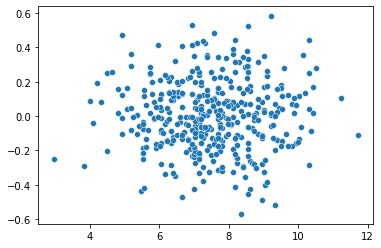

(6.097920558687301, 0.015)

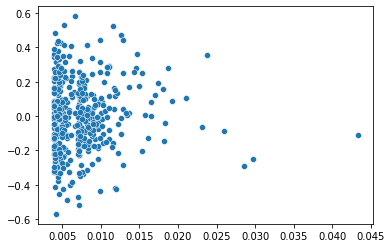

In [ ]:
##
hdiag = result1.get_influence().hat_matrix_diag
student_resid = result1.resid/(result1.scale*(1-hdiag))*0.5
sns.scatterplot(x=result1.fittedvalues, y=student_resid)
plt.show()
sns.scatterplot(x=hdiag, y=student_resid)
result1.scale, 2*(result1.df_model+1)/result1.nobs

No outliers, a few high leverage observation with small studentized residuals.